# **Feature Scaling - Standardization**

**-->Standardization is a feature scaling technique that transforms data to have mean 0 and standard deviation 1.**

**In machine learning, features can have very different ranges.**

Example:

Age → 0 to 100

Salary → 10,000 to 1,000,000

**Big numbers can dominate small numbers, and many ML algorithms get confused or slow because of this.**

   **What is Standardization?**

**--> Standardization is a feature scaling technique that:**

     Makes the mean (x̄) = 0

     Makes the standard deviation (σ) = 1

**Formula For Standardized Value**

**z = (x - x̄) / σ**

**z = (x - mean) / standard deviation**


# **EXAMPLE**

In [156]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
df = pd.read_csv('user_data.csv')

In [158]:
df

,Age,Salary,Purchased
0,56,62476,0
1,46,307955,1
2,32,168280,0
3,25,676510,1
4,38,596468,1
...,...,...,...
495,56,336623,1
496,49,471951,1
497,41,82264,0
498,40,24275,0


# **Train test split    (Divide data into training data (70%) and testing data (30%))**

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((350, 2), (150, 2))

# **Feature Scaling using Standardization (StandardScaler)**
**Fit on training data and apply the same scaling to test data**

**Scale features so they have mean 0 and standard deviation 1**

**(Note: Never fit the scaler on test data (avoids data leakage))**

In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [161]:
scaler.mean_

array([3.91714286e+01, 4.91040646e+05])

In [162]:
X_train_scaled

array([[-0.74358168,  1.39910041],
       [-0.50035403, -1.11210206],
       [ 1.20223954,  0.00942718],
       [ 1.12116366,  0.85832522],
       [ 1.36439131, -1.6089747 ],
       [ 0.877936  , -0.28017281],
       [-0.6625058 , -1.17375743],
       [-1.63541641, -1.09096107],
       [ 1.44546719,  1.4161882 ],
       [-1.55434052, -1.09208463],
       [-0.6625058 ,  1.19529641],
       [ 1.44546719, -0.04211972],
       [-0.6625058 ,  0.14367593],
       [ 1.04008777,  1.47783307],
       [ 0.47255658,  0.12342399],
       [ 0.22932893, -0.9454313 ],
       [ 0.22932893, -0.52028049],
       [-0.25712638,  0.5250677 ],
       [ 0.79686012,  0.37284211],
       [ 0.31040481, -1.71150498],
       [ 0.877936  ,  1.33394137],
       [-0.74358168, -0.2326581 ],
       [ 1.52654308,  0.28758163],
       [ 0.06717716,  0.48589387],
       [ 0.79686012, -0.06681687],
       [-0.90573345,  1.3130629 ],
       [ 0.79686012, -0.01606801],
       [ 1.12116366, -1.40097751],
       [ 0.47255658,

**IN ABOVE DATA RETURNED IN NUMRICAL FORMAT (NUMPY) SO WE Converted in PANDA**

In [163]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [164]:
X_train_scaled

,Age,Salary
0,-0.743582,1.399100
1,-0.500354,-1.112102
2,1.202240,0.009427
3,1.121164,0.858325
4,1.364391,-1.608975
...,...,...
345,-0.338202,-0.569412
346,-1.635416,-0.440578
347,-1.554341,0.136490
348,-1.148961,-1.022977


In [165]:
np.round(X_train.describe(), 1)

,Age,Salary
count,350.0,350.0
mean,39.2,491040.6
std,12.4,286110.0
min,18.0,1404.0
25%,28.2,237040.5
50%,40.5,486229.0
75%,50.0,732152.5
max,59.0,994176.0


In [166]:
np.round(X_train_scaled.describe(), 1)

,Age,Salary
count,350.0,350.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.7,-1.7
25%,-0.9,-0.9
50%,0.1,-0.0
75%,0.9,0.8
max,1.6,1.8


**some times here we see mean is exactly == 0 but SD is ~ around 1.1**

**But in Standardization MEAN == 0 AND SD == 1**

**HERE WE SEE THE VALUES (MEAN , SD .....) USING PANDA So StandardScaler produces unit variance (population std = 1), but pandas .describe() shows sample std (N−1), which appears slightly larger.**

In [167]:

np.std(X_train_scaled, axis=0)

Age       1.0
Salary    1.0
dtype: float64

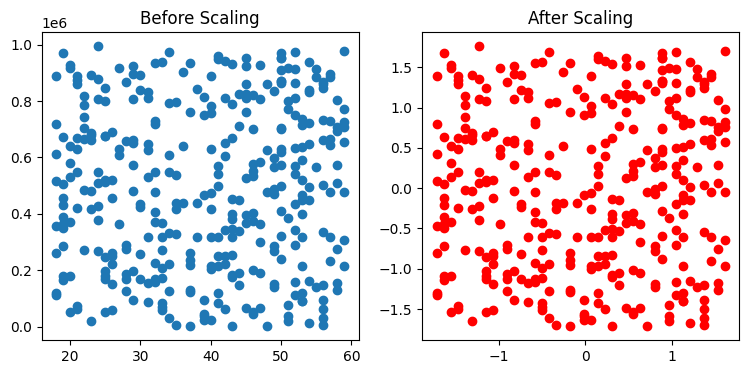

In [168]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4))

ax1.scatter(X_train['Age'], X_train['Salary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['Salary'],color='red')
ax2.set_title("After Scaling")
plt.show()

# **How Standardization Changes Feature Spread**
**In the first figure, we clearly see that the difference between Age and Income is very large. After standardization, this difference becomes much smaller because both features are brought to the same scale. As a result, the machine learning model becomes easier to train.**

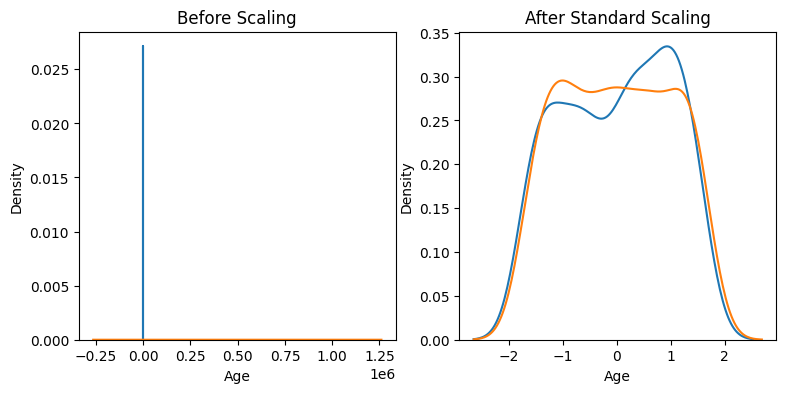

In [169]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4))


ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['Salary'], ax=ax1)


ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['Salary'], ax=ax2)
plt.show()

# **Effect of Standardization on Feature Distribution**
**Before standardization, Age and Salary have different ranges and spreads. After standardization, both features are centered around zero and have similar spread, while the overall shape of the distribution remains the same.**

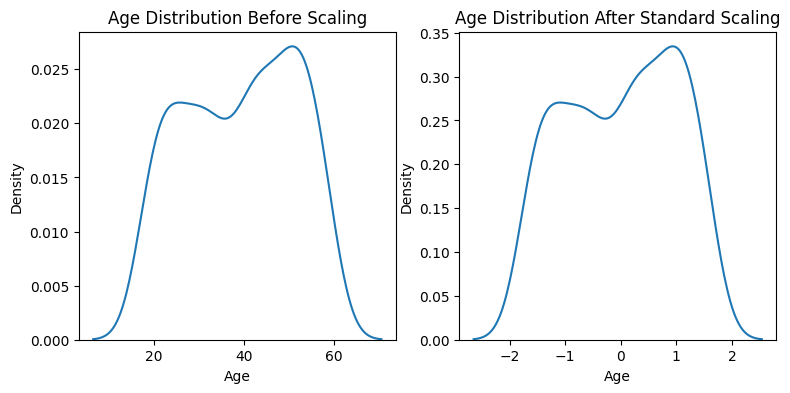

In [170]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4))


ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)


ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

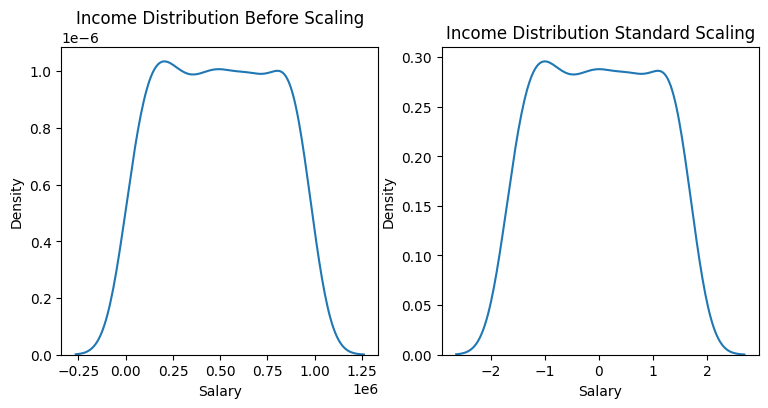

In [171]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4))


ax1.set_title('Income Distribution Before Scaling')
sns.kdeplot(X_train['Salary'], ax=ax1)


ax2.set_title('Income Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['Salary'], ax=ax2)
plt.show()

# Why scaling is important?

In [172]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [173]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [174]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.9733333333333334
Scaled 0.9733333333333334




**Without scaling:**
**Accuracy = 0.97 → The model may struggle because Age and Salary are on very different scales.**

**With scaling:**
**Accuracy = 0.97 → Even if the accuracy is the same or slightly lower than without scaling, the features are standardized, allowing the model to train better and improving performance stability.**

**This clearly shows that scaling can enhance model training and, in many cases, improve accuracy given in below image.**
![Alt Text](accuracy.png)


# Effect of Outlier

In [175]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'Salary':[890,1350000,1550000],'Purchased':[0,1,1]})], ignore_index=True)


In [176]:
df

,Age,Salary,Purchased
0,56,62476,0
1,46,307955,1
2,32,168280,0
3,25,676510,1
4,38,596468,1
...,...,...,...
498,40,24275,0
499,49,597562,1
500,5,890,0
501,90,1350000,1


**We added extreme values in the dataset:**

**Age = 5, 90, 95 (outside the usual 18–59 range)**

**Salary = 890, 1,350,000, 1,550,000 (much smaller and much larger than existing salaries)**

**These values are outliers because they lie outside the normal min/max range of the features.**

**Purpose: To observe how scaling handles extreme values.**

**Without scaling, the large salary dominates the model.**

**With standardization, all features contribute fairly.**

**This shows the importance of scaling, especially when datasets contain outliers or features with very different ranges.**

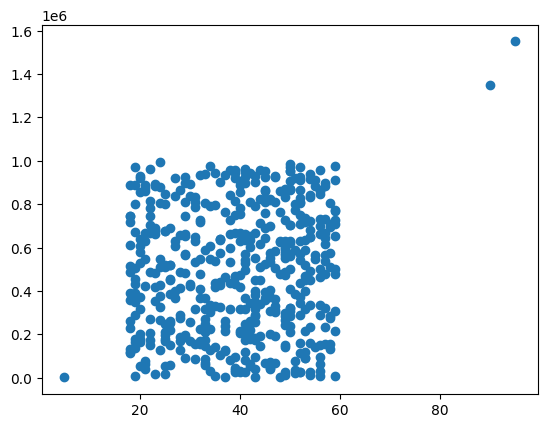

In [177]:
plt.scatter(df['Age'], df['Salary'])

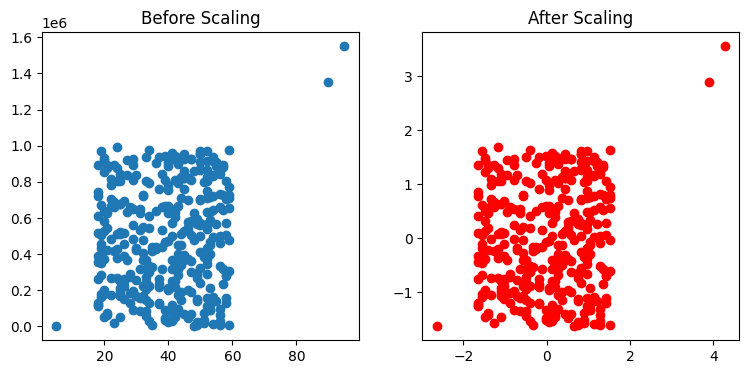

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape
((282, 2), (121, 2))
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4))

ax1.scatter(X_train['Age'], X_train['Salary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['Salary'],color='red')
ax2.set_title("After Scaling")
plt.show()

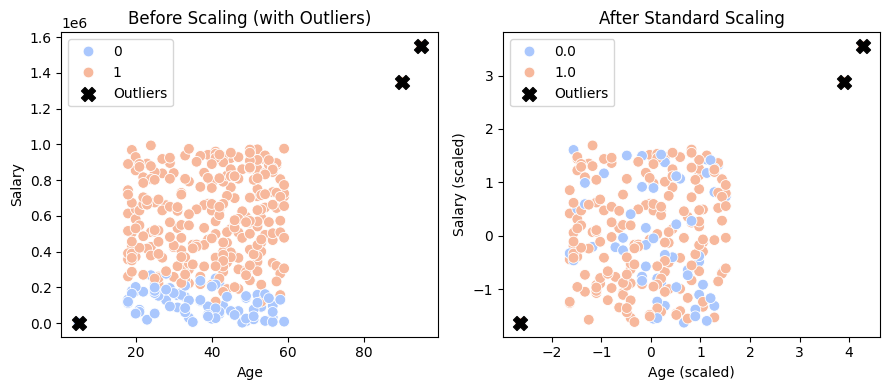

In [181]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4))

# Scatter plot before scaling
sns.scatterplot(x=X_train['Age'], y=X_train['Salary'], ax=ax1, hue=y_train, palette='coolwarm', s=60)
ax1.set_title("Before Scaling (with Outliers)")
ax1.set_xlabel("Age")
ax1.set_ylabel("Salary")

# Highlight outliers
outlier_age = [5, 90, 95]
outlier_salary = [890, 1350000, 1550000]
ax1.scatter(outlier_age, outlier_salary, color='black', s=100, marker='X', label='Outliers')
ax1.legend()

# Scatter plot after scaling
sns.scatterplot(x=X_train_scaled['Age'], y=X_train_scaled['Salary'], ax=ax2, hue=y_train, palette='coolwarm', s=60)
ax2.set_title("After Standard Scaling")
ax2.set_xlabel("Age (scaled)")
ax2.set_ylabel("Salary (scaled)")

# Highlight outliers after scaling
scaled_outliers = scaler.transform(pd.DataFrame({
    'Age': outlier_age,
    'Salary': outlier_salary
}))
ax2.scatter(scaled_outliers[:,0], scaled_outliers[:,1], color='black', s=100, marker='X', label='Outliers')
ax2.legend()

plt.tight_layout()
plt.show()


### Effect of Scaling with Outliers

In the scatter plots above, we intentionally added outliers in `Age` (5, 90, 95) and `Salary` (890, 1,350,000, 1,550,000) to demonstrate their effect.  

- **Before scaling:**
- The Salary values dominate the plot because they are much larger than Age.
- Outliers stretch the feature range, making it difficult for models to learn from smaller-scale features.


- **After standard scaling:**
- Both Age and Salary are transformed to the same scale (mean = 0, std = 1).
- Outliers are still present, but the features now contribute fairly,
- making it easier for models to learn patterns from all features.  

**Standardization ensures all features, including those with extreme values, are balanced, improving training stability and model performance.**
